In [48]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob
import re

In [49]:
spacecraft_launches = pd.DataFrame(columns=("Year","Spacecraft Name","NSSDCA ID","Launch Date","Site","Vehicle","Funder"))

for file in glob("spaceCraftquerys/*.csv"):
    df = pd.read_csv(file,index_col=0,parse_dates=['Launch Date'])
    df["Year"] = np.full((len(df)),int(file.split('\\')[1][:-4]))
    spacecraft_launches = spacecraft_launches.append(df)

spacecraft_launches = spacecraft_launches[spacecraft_launches['Vehicle'].str.contains(r'[^\s]+',regex=True,na=False)]

spacecraft_launches = spacecraft_launches.drop_duplicates(subset=['Launch Date','Site','Vehicle'])


In [50]:
soyuz = spacecraft_launches[spacecraft_launches["Vehicle"].str.contains('Soyuz',regex=True,na=False)].sort_values('Year')
udssr = spacecraft_launches[
    spacecraft_launches["Funder"].str.contains(r'U\.S\.S\.R|Russia',regex=True,na=False) |
    spacecraft_launches["Site"].str.contains(r'U\.S\.S\.R|Russia|Baikonur Cosmodrome',regex=True,na=False)
     ].sort_values('Year')

In [51]:
falcon = spacecraft_launches[spacecraft_launches["Vehicle"].str.contains('Falcon',regex=True,na=False)].sort_values('Year')
shuttle = spacecraft_launches[spacecraft_launches["Vehicle"].str.contains('Shuttle',regex=True,na=False)].sort_values('Year') 
usa = spacecraft_launches[
    spacecraft_launches["Funder"].str.contains(r'United States',regex=True,na=False) |
    spacecraft_launches["Site"].str.contains(r'United States',regex=True,na=False)    
].sort_values('Year')

In [52]:
esa = spacecraft_launches[spacecraft_launches["Site"].str.contains(r'French Guiana',regex=True,na=False)].sort_values('Year')
ariane = spacecraft_launches[spacecraft_launches["Vehicle"].str.contains('Ariane',regex=True,na=False)].sort_values('Year')

In [53]:
china = spacecraft_launches[
    spacecraft_launches["Funder"].str.contains(r'Peoples Republic of China',regex=True,na=False) |
    spacecraft_launches["Site"].str.contains(r'Peoples Republic of China',regex=True,na=False)

].sort_values('Year')
japan = spacecraft_launches[spacecraft_launches["Site"].str.contains(r'Japan',regex=True,na=False)].sort_values('Year')


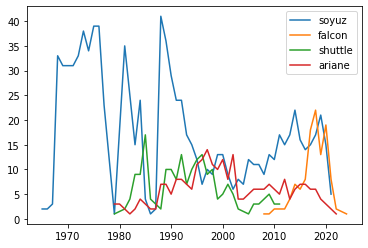

In [54]:
soyuz['Year'].value_counts().sort_index().plot(y=1,label='soyuz')
falcon['Year'].value_counts().sort_index().plot(y=1,label='falcon')
shuttle['Year'].value_counts().sort_index().plot(y=1,label='shuttle')
ariane['Year'].value_counts().sort_index().plot(y=1,label='ariane')

plt.legend()

In [55]:
for year in spacecraft_launches['Year'].unique():
    print(f"{year}: {spacecraft_launches[spacecraft_launches['Year']==year]['Vehicle'].value_counts().index[0]}")

1957:  Modified SS-6 (Sapwood)
1958:  Vanguard
1959:  Thor
1960:  Thor
1961:  Thor
1962:  Thor-Agena
1963:  Thor Augmented Delta-Agena D
1964:  Thor Augmented Delta-Agena D
1965:  Thor Augmented Delta-Agena D
1966:  Atlas-Agena D
1967:  Voskhod
1968:  Soyuz
1969:  Soyuz
1970:  Soyuz
1971:  Soyuz
1972:  Soyuz
1973:  Soyuz
1974:  Soyuz
1975:  Soyuz
1976:  Soyuz
1977:  Soyuz
1978:  Modified SS-6 (Sapwood) with 2nd Generation (Longer) Upper Stage
1979:  Modified SS-6 (Sapwood) with 2nd Generation (Longer) Upper Stage
1980:  Modified SS-6 (Sapwood) with 2nd Generation (Longer) Upper Stage
1981:  Soyuz-U
1982:  Modified SS-6 (Sapwood) with 2nd Generation (Longer) Upper Stage
1983:  Modified SS-6 (Sapwood) with 2nd Generation (Longer) Upper Stage
1984:  Soyuz
1985:  Modified SS-6 (Sapwood) with 2nd Generation (Longer) Upper Stage
1986:  Modified SS-6 (Sapwood) with 2nd Generation (Longer) Upper Stage
1987:  Modified SS-6 (Sapwood) with 2nd Generation (Longer) Upper Stage
1988:  Soyuz
1989:  S

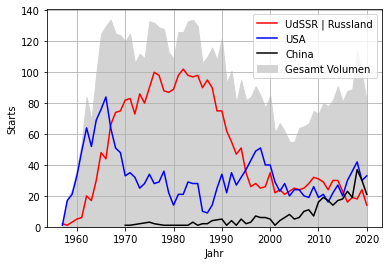

In [59]:
plt.fill_between(
    spacecraft_launches['Year'][spacecraft_launches['Year']<2021].value_counts().sort_index().index,
    spacecraft_launches['Year'][spacecraft_launches['Year']<2021].value_counts().sort_index(),
    label='Gesamt Volumen', color= 'lightgrey')

udssr['Year'][udssr['Year']<2021].value_counts().sort_index().plot(y=1,label='UdSSR | Russland',color='red')
usa['Year'][usa['Year']<2021].value_counts().sort_index().plot(y=1,label='USA',color='blue')
china['Year'][china['Year']<2021].value_counts().sort_index().plot(y=1,label='China',color='black')
# japan['Year'].value_counts().sort_index().plot(y=1,label='Japan',color='deeppink')
# esa['Year'].value_counts().sort_index().plot(y=1,label='ESA',color='midnightblue')
plt.xlabel('Jahr')
plt.ylabel('Starts')
plt.grid()
plt.ylim(0)
plt.legend()

In [57]:
# spacecraft_launches = pd.DataFrame(columns=("Year","Spacecraft Name","NSSDCA ID","Launch Date","Site","Vehicle","Funder"))

# for file in glob("spaceCraftquerys/*.csv"):
#     df = pd.read_csv(file,index_col=0,parse_dates=['Launch Date'])
#     df["Year"] = np.full((len(df)),int(file.split('\\')[1][:-4]))
#     spacecraft_launches = spacecraft_launches.append(df)
# spacecraft_launches = spacecraft_launches[spacecraft_launches['Vehicle'].str.contains(r'[^\s]+',regex=True,na=False)]

# usa = spacecraft_launches[spacecraft_launches["Funder"].str.contains(r'United States',regex=True,na=False)].sort_values('Year')
# udssr = spacecraft_launches[spacecraft_launches["Funder"].str.contains(r'U\.S\.S\.R|Russia',regex=True,na=False)].sort_values('Year')

# usa_unoosa = pd.read_csv('usa_spacecraft.csv', sep = ',')
# udssr_unoosa = pd.read_csv('russia_spacecraft.csv', sep = ',')

# udssr['Year'][udssr['Year']<2021].value_counts().sort_index().plot(y=1,label='USSR | Russia (NDSSCA)',color='red')
# usa['Year'][usa['Year']<2021].value_counts().sort_index().plot(y=1,label='USA (NDSSCA)',color='blue')

# plt.plot(
#     usa_unoosa['Year'][usa_unoosa['Year']<2021],
#     usa_unoosa[' Count'][usa_unoosa['Year']<2021],
#     label='USA (UNOOSA)',color='lightblue'
# )
# plt.plot(
#     udssr_unoosa['Year'][udssr_unoosa['Year']<2021],
#     udssr_unoosa[' Count'][udssr_unoosa['Year']<2021],
#     label='UDSSR | Russia (UNOOSA)',color='pink'
# )


# plt.xlabel('Year')
# plt.ylabel('Spacecraft')
# plt.grid()
# plt.ylim(0)
# plt.legend()


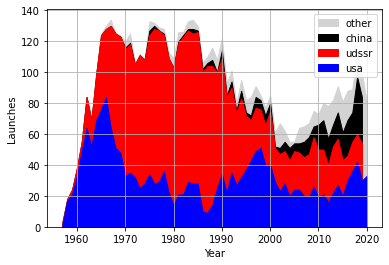

In [58]:
def add_by_year(d1 , d2):
    if type(d1) != tuple:
        d1 = d1['Year'].value_counts()
    else:
        d1 = pd.Series(index=d1[0],values=d1[1])

    if type(d2) != tuple:
        d2 = d2['Year'].value_counts()
    else:
        d2 = pd.Series(index=d2[0],data=d2[1])

    index = np.array(
        range(
            min(d1.index.min(),d2.index.min()),
            max(d1.index.max(),d2.index.max()))
        )

    sumd = np.zeros_like(index)
    
    for i in range(index.shape[0]):
        if index[i] in d1.index:
            sumd[i] += d1[index[i]]
        if index[i] in d2.index:
            sumd[i] += d2[index[i]]
    return index, sumd




plt.fill_between(
    spacecraft_launches['Year'][spacecraft_launches['Year']<2021].value_counts().sort_index().index,
    spacecraft_launches['Year'][spacecraft_launches['Year']<2021].value_counts().sort_index(),
    label='other', color= 'lightgrey')

plt.fill_between(
    *add_by_year(
        china[china['Year']<2021],
        add_by_year(usa[usa['Year']<2021],udssr[udssr['Year']<2021])
    ),
    label='china', color= 'black')

plt.fill_between(
    *add_by_year(usa[usa['Year']<2021],udssr[udssr['Year']<2021]),
    label='udssr', color= 'red')

plt.fill_between(
    usa['Year'][usa['Year']<2021].value_counts().sort_index().index,
    usa['Year'][usa['Year']<2021].value_counts().sort_index(),
    label='usa', color= 'blue')


plt.xlabel('Year')
plt.ylabel('Launches')
plt.grid()
plt.ylim(0)
plt.legend()